# Popularity of Different Programming Languages over Time

## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [1]:
import datetime as dt

import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [2]:
df = pd.read_csv("QueryResults.csv")

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [3]:
df.head()

,m,TagName,Unnamed: 2
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,82
3,2008-08-01 00:00:00,c#,503
4,2008-08-01 00:00:00,c++,164


In [4]:
df.tail()

,m,TagName,Unnamed: 2
2868,2025-10-01 00:00:00,php,110
2869,2025-10-01 00:00:00,python,737
2870,2025-10-01 00:00:00,r,196
2871,2025-10-01 00:00:00,ruby,11
2872,2025-10-01 00:00:00,swift,141


In [5]:
df.columns = ["DATE", "TAG", "POSTS"]

**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [6]:
df.shape

(2873, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2873 entries, 0 to 2872
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   DATE    2873 non-null   object
 1   TAG     2873 non-null   object
 2   POSTS   2873 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 67.5+ KB


**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [8]:
df.groupby("TAG").sum(numeric_only=True).sort_values("POSTS", ascending=False)

,POSTS
TAG,
javascript,2526936
python,2209183
java,1918099
c#,1623805
php,1464409
c++,814869
r,510834
c,408196
swift,336239


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 

In [9]:
df.groupby(["TAG"]).count().sort_values("DATE")

,DATE,POSTS
TAG,,
go,192,192
swift,198,198
r,205,205
assembly,207,207
java,207,207
delphi,207,207
c++,207,207
c,207,207
python,207,207


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [10]:
pd.to_datetime(df["DATE"][:15], format="%Y-%m-%d %H:%M:%S")

0    2008-07-01
1    2008-08-01
2    2008-08-01
3    2008-08-01
4    2008-08-01
5    2008-08-01
6    2008-08-01
7    2008-08-01
8    2008-08-01
9    2008-08-01
10   2008-08-01
11   2008-08-01
12   2008-09-01
13   2008-09-01
14   2008-09-01
Name: DATE, dtype: datetime64[ns]

In [11]:
df["DATE"] = pd.to_datetime(df["DATE"], format="%Y-%m-%d %H:%M:%S")
df.sample(5)

,DATE,TAG,POSTS
2178,2021-09-01,go,615
1609,2018-04-01,python,16906
118,2009-05-01,php,1161
1458,2017-05-01,swift,4084
873,2013-12-01,c#,13518


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2873 entries, 0 to 2872
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    2873 non-null   datetime64[ns]
 1   TAG     2873 non-null   object        
 2   POSTS   2873 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 67.5+ KB


## Data Manipulation



In [13]:
df

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,82
3,2008-08-01,c#,503
4,2008-08-01,c++,164
...,...,...,...
2868,2025-10-01,php,110
2869,2025-10-01,python,737
2870,2025-10-01,r,196
2871,2025-10-01,ruby,11


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [14]:
pivot_df = df.pivot_table(index="DATE", columns="TAG", values="POSTS")
pivot_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,82.0,503.0,164.0,13.0,NaN,220.0,160.0,28.0,157.0,119.0,NaN,68.0,NaN
2008-09-01,28.0,320.0,1637.0,751.0,104.0,NaN,1121.0,629.0,128.0,472.0,533.0,6.0,285.0,NaN
2008-10-01,16.0,302.0,1982.0,804.0,112.0,NaN,1142.0,720.0,128.0,603.0,504.0,NaN,245.0,NaN
2008-11-01,16.0,257.0,1728.0,733.0,139.0,NaN,951.0,581.0,97.0,497.0,447.0,1.0,154.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-01,37.0,176.0,455.0,405.0,33.0,49.0,421.0,479.0,15.0,170.0,1051.0,255.0,26.0,143.0
2025-07-01,35.0,148.0,418.0,350.0,28.0,17.0,388.0,445.0,15.0,108.0,977.0,212.0,13.0,154.0
2025-08-01,22.0,122.0,324.0,299.0,34.0,40.0,280.0,296.0,5.0,87.0,723.0,159.0,17.0,92.0


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [15]:
pivot_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 208 entries, 2008-07-01 to 2025-10-01
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   assembly    207 non-null    float64
 1   c           207 non-null    float64
 2   c#          208 non-null    float64
 3   c++         207 non-null    float64
 4   delphi      207 non-null    float64
 5   go          192 non-null    float64
 6   java        207 non-null    float64
 7   javascript  207 non-null    float64
 8   perl        207 non-null    float64
 9   php         207 non-null    float64
 10  python      207 non-null    float64
 11  r           205 non-null    float64
 12  ruby        207 non-null    float64
 13  swift       198 non-null    float64
dtypes: float64(14)
memory usage: 24.4 KB


In [16]:
pivot_df.fillna(0, inplace=True)

In [17]:
pivot_df.isnull().sum()

TAG
assembly      0
c             0
c#            0
c++           0
delphi        0
go            0
java          0
javascript    0
perl          0
php           0
python        0
r             0
ruby          0
swift         0
dtype: int64

## Data Visualisaton with with Matplotlib


In [18]:
print(plt.style.available)

# Apply a Seaborn-like style
# plt.style.use("seaborn-v0_8-dark")

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

<Axes: xlabel='DATE'>

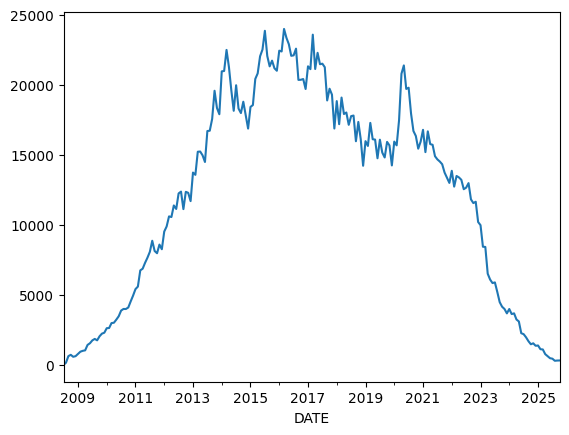

In [19]:
pivot_df["javascript"].plot()

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

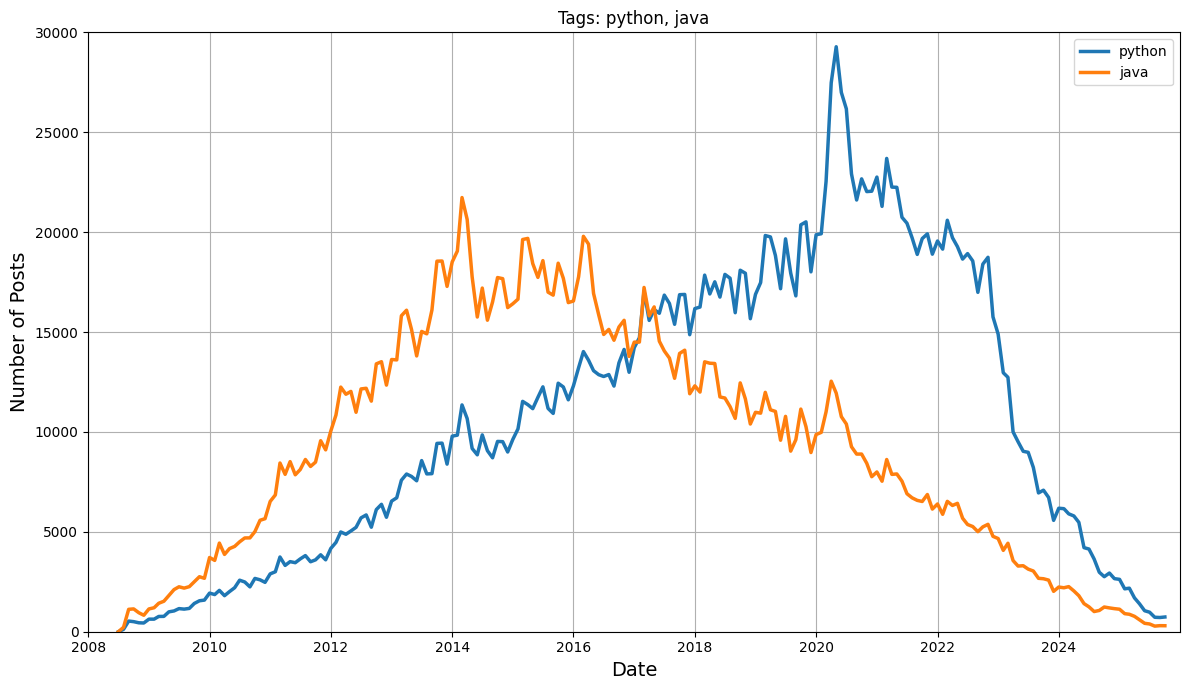

In [20]:
plt.figure(figsize=(12, 7))
plt.title("Tags: python, java")

plt.plot(pivot_df["python"], linewidth=2.5, label="python")
plt.plot(pivot_df["java"], linewidth=2.5, label="java")

plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of Posts", fontsize=14)
plt.legend()
plt.xlim(dt.date(2008, 1, 1), dt.date(2025, 12, 31))
plt.ylim(0, 30_000)
plt.grid(visible=True)
plt.tight_layout()
plt.show()

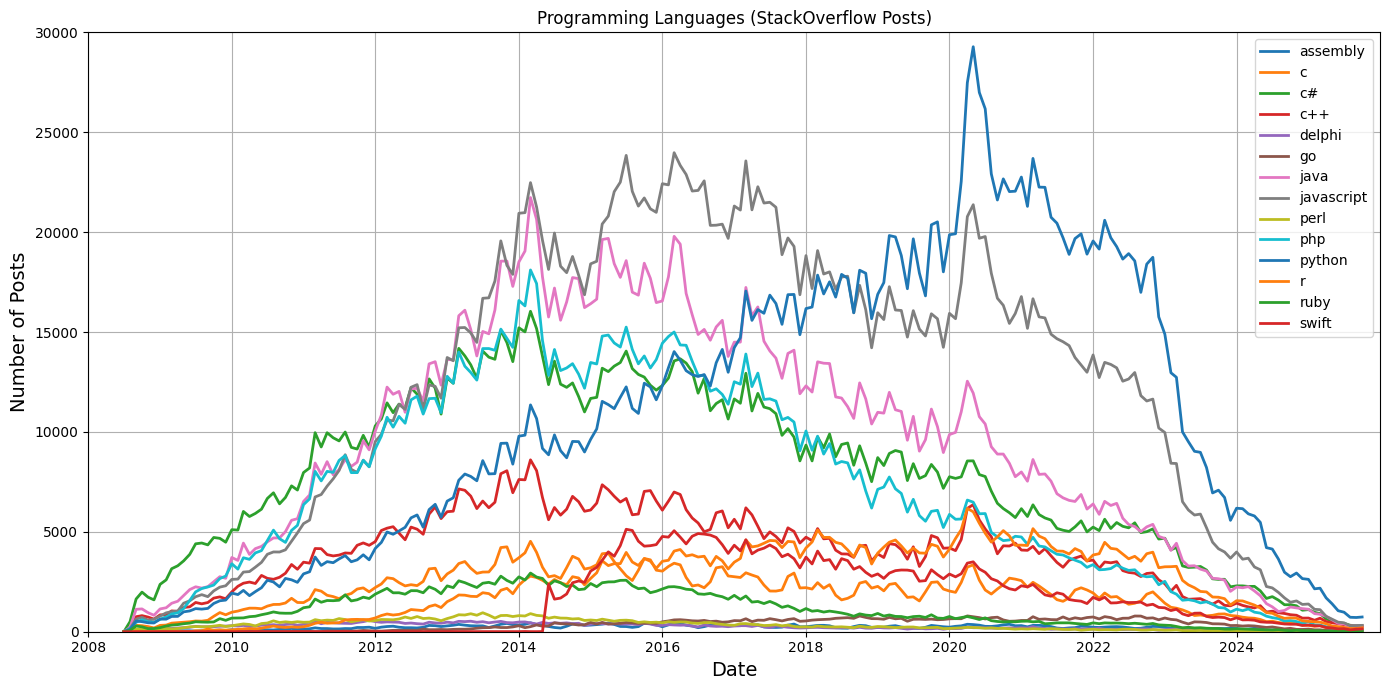

In [21]:
plt.figure(figsize=(14, 7))
plt.title("Programming Languages (StackOverflow Posts)")

for language in pivot_df.columns:
    plt.plot(pivot_df[language], linewidth=2, label=language)

plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of Posts", fontsize=14)
plt.legend()
plt.xlim(dt.date(2008, 1, 1), dt.date(2025, 12, 31))
plt.ylim(0, 30_000)
plt.grid(visible=True)
plt.tight_layout()
plt.show()

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

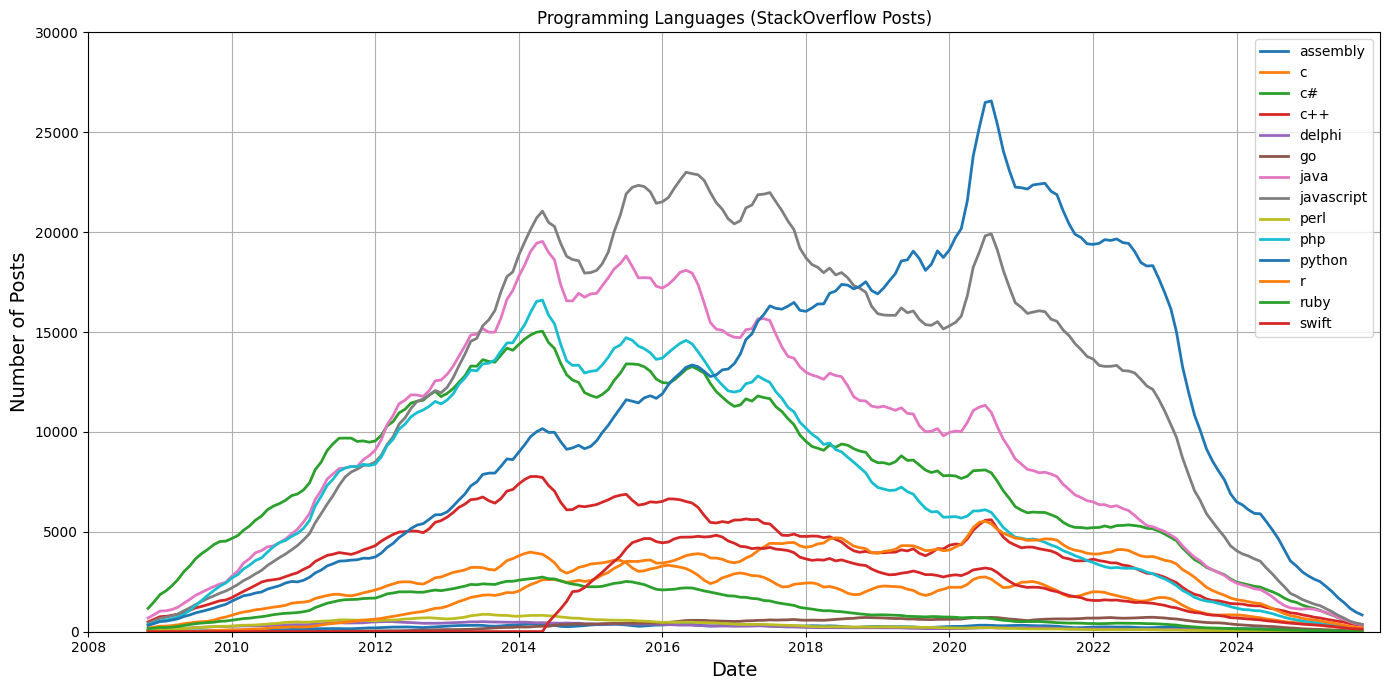

In [22]:
roll_df = pivot_df.rolling(window=5).mean()

plt.figure(figsize=(14, 7))
plt.title("Programming Languages (StackOverflow Posts)")

for language in roll_df.columns:
    plt.plot(roll_df[language], linewidth=2, label=language)

plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of Posts", fontsize=14)
plt.legend()
plt.xlim(dt.date(2008, 1, 1), dt.date(2025, 12, 31))
plt.ylim(0, 30_000)
plt.grid(visible=True)
plt.tight_layout()
plt.show()